In [1]:
# import all necessary packages  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat


In [2]:
# Reading all datas 
benin_data = pd.read_csv("../data/clean_benin_data.csv", parse_dates=['Timestamp'])
sierraleone_data = pd.read_csv("../data/clean_sierraleone_data.csv", parse_dates=['Timestamp'])
togo_data = pd.read_csv("../data/clean_togo_data.csv", parse_dates=['Timestamp'])

In [3]:
# Add country labels 
benin_data["Country"] = "Benin"
sierraleone_data["Country"] = "Sierraleone"
togo_data["Country"] = "Togo"

# Combine datasets
df = pd.concat([benin_data, sierraleone_data, togo_data], ignore_index=True)

C:\Users\W-HP\AppData\Local\Temp\ipykernel_18288\4286726735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")
C:\Users\W-HP\AppData\Local\Temp\ipykernel_18288\4286726735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")
C:\Users\W-HP\AppData\Local\Temp\ipykernel_18288\4286726735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")


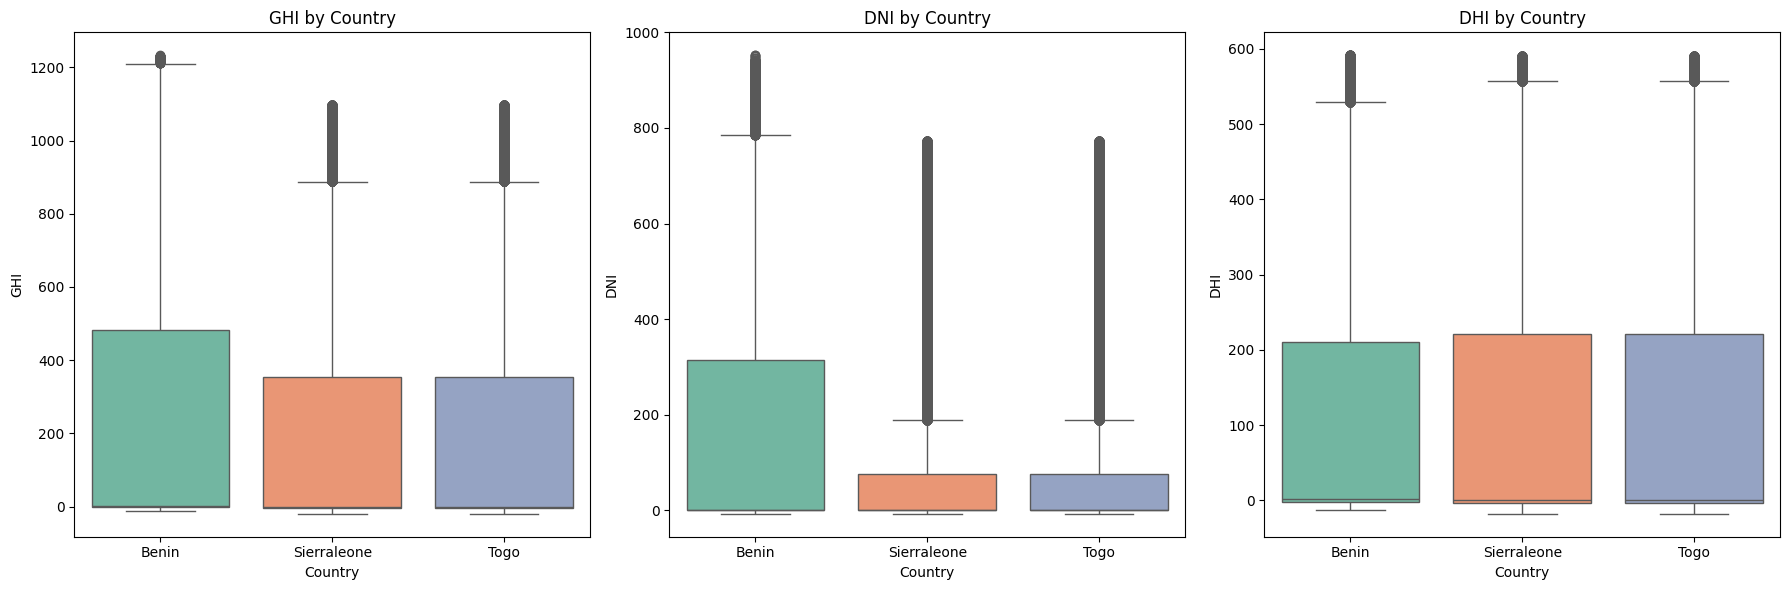

In [5]:
metrics = ['GHI', 'DNI', 'DHI']

# Create boxplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x="Country", y=metric, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{metric} by Country')
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

In [6]:
summary = df.groupby("Country")[metrics].agg(['mean', 'median', 'std']).round(2)
print(summary)

                GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.34    1.8  330.87  167.19   -0.1  261.71  110.91    1.6   
Sierraleone  196.44    0.3  291.24  104.53   -0.1  201.70  110.11   -0.1   
Togo         196.44    0.3  291.24  104.53   -0.1  201.70  110.11   -0.1   

                     
                std  
Country              
Benin        152.92  
Sierraleone  154.17  
Togo         154.17  


C:\Users\W-HP\AppData\Local\Temp\ipykernel_18288\1584710677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


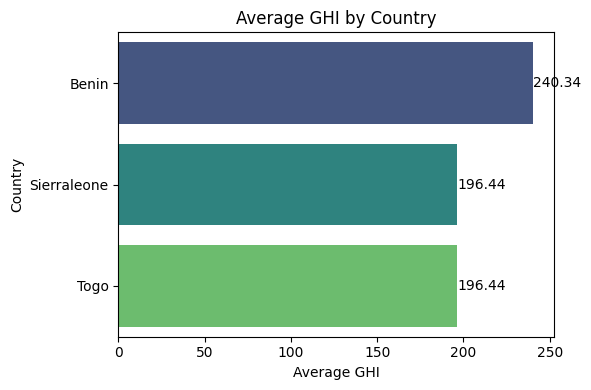

In [7]:
# Compute average GHI per country
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False).round(2)

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")

# Add data labels
for index, value in enumerate(avg_ghi.values):
    plt.text(value + 0.1, index, str(value), va='center')

plt.title("Average GHI by Country")
plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import scipy.stats as stats
benin_data['Country'] = 'Benin'
togo_data['Country'] = 'Togo'
sierraleone_data['Country'] = 'Sierraleone'

# Combine the datasets
combined_data = pd.concat([benin_data, togo_data], ignore_index=True)

# Group GHI values by country
groups = [group['GHI'].values for name, group in combined_data.groupby('Country')]

# Perform One-Way ANOVA
anova_result = stats.f_oneway(*groups)

print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*groups)

print(f'Kruskal-Wallis H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}')

ANOVA F-statistic: 5213.7006305619, p-value: 0.0
Kruskal-Wallis H-statistic: 3600.693588663815, p-value: 0.0


 ## Interpret the Results

### ANOVA: If the p-value is less than the significance level (commonly 0.05), you reject the null hypothesis, indicating significant differences in GHI values between countries.

### Kruskal-Wallis: Similarly, for the Kruskal-Wallis test, a p-value less than 0.05 also indicates significant differences.

This approach allows you to assess the significance of differences in GHI values between countries using either a one-way ANOVA or a Kruskal-Wallis test, depending on the data's characteristics.